In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("stock_data.csv")

In [4]:
print(df.shape)

(2416, 7)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB
None


In [6]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07  


In [7]:
print(df.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


explaination of the dataset
* Date: 2010-06-29
1. Open: 19.00 → stock opened at $19
2. High: 25.00 → highest price during the day was $25
3. Low: 17.54 → lowest price during the day was $17.54
4. Close: 23.89 → closed at $23.89
5. Adj Close: 23.89 → adjusted for splits/dividends
6. Volume: 18,766,300 → 18.7 million shares were traded


In [8]:
df['Daily_Return'] = df['Adj Close'].pct_change()

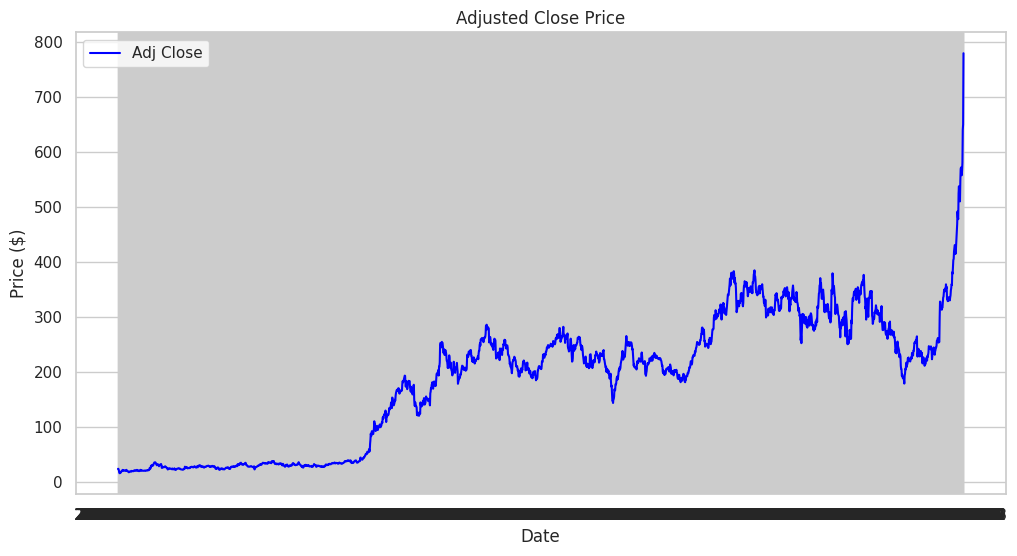

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close', color='blue')
plt.title("Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

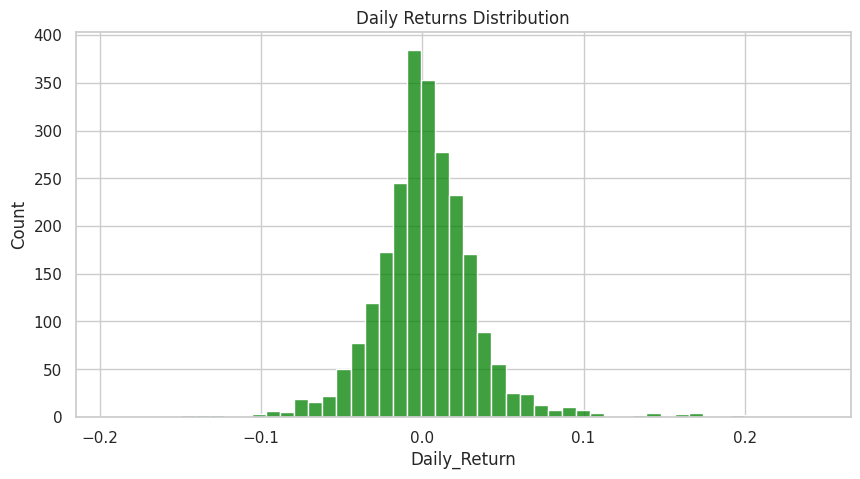

In [10]:
# Plot histogram of daily returns
plt.figure(figsize=(10,5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, color='green')
plt.title("Daily Returns Distribution")
plt.show()

In [11]:
# Moving averages
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA200'] = df['Adj Close'].rolling(200).mean()


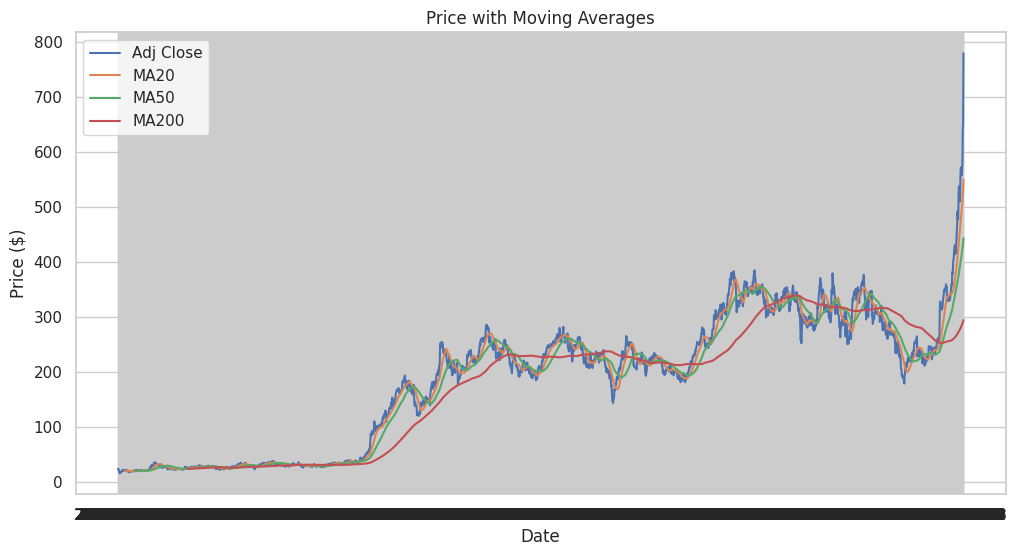

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')
plt.plot(df['Date'], df['MA200'], label='MA200')
plt.title("Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()